In [1]:
import numpy as np
import os
import urllib
import gzip
import struct
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def download_data(url, force_download=False): 
    fname = url.split("/")[-1]
    if force_download or not os.path.exists(fname):
        urllib.request.urlretrieve(url, fname)
    return fname

def read_data(label_url, image_url):
    with gzip.open(download_data(label_url)) as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        label = np.fromstring(flbl.read(), dtype=np.int8)
    with gzip.open(download_data(image_url), 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        image = np.fromstring(fimg.read(), dtype=np.uint8).reshape(len(label), rows, cols)
    return (label, image)

In [3]:
path = 'http://yann.lecun.com/exdb/mnist/'

(train_lbl, train_img) = read_data(
    path+'train-labels-idx1-ubyte.gz', path+'train-images-idx3-ubyte.gz')

(test_lbl, test_img) = read_data(
    path+'t10k-labels-idx1-ubyte.gz', path+'t10k-images-idx3-ubyte.gz')

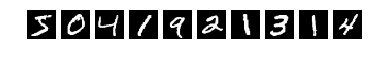

label: [5 0 4 1 9 2 1 3 1 4]


In [4]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train_img[i], cmap='Greys_r')
    plt.axis('off')
plt.show()
print('label: %s' % (train_lbl[0:10],))

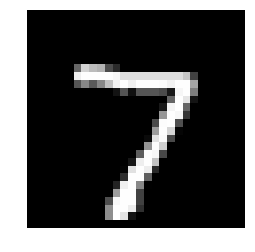

In [5]:
plt.imshow(test_img[0], cmap='Greys_r')
plt.axis('off')
plt.show()

In [6]:
num_examples = 1000

In [7]:
train_img = train_img[0:num_examples]
train_lbl = train_lbl[0:num_examples]
train_img.shape, train_lbl.shape

((1000, 28, 28), (1000,))

In [8]:
test_img.shape, test_lbl.shape

((10000, 28, 28), (10000,))

In [9]:
x_data = train_img.reshape(-1, 28 * 28) / np.float32(256)
x_data.shape

(1000, 784)

In [10]:
def to_one_hot(labels, num_classes=10):
    return np.eye(num_classes)[labels]

y_labels = to_one_hot(train_lbl)
y_labels.shape

(1000, 10)

In [11]:
from layers.linear_layer import *
from nets.fcnn import *

In [12]:
layers = [
    LinearLayer(name="input", n_in=x_data.shape[1], n_out=10, activation=sigmoid_function),
    LinearLayer(name="hidden 1", n_in=10, n_out=15, activation=sigmoid_function),
    LinearLayer(name="hidden 2", n_in=15, n_out=10, activation=sigmoid_function),
    LinearLayer(name="output", n_in=10, n_out=y_labels.shape[1], activation=sigmoid_function)
]

nn = FCNeuralNet(layers=layers, cost_func=subtract_err)
# print_network(nn)

In [13]:
def print_network(nn):
    print("network:")
    for layer in nn.layers:
        print("layer - %s: weights: %s" %
              (layer.name, layer.weights.shape))
        
print_network(nn)

network:
layer - input: weights: (784, 10)
layer - hidden 1: weights: (10, 15)
layer - hidden 2: weights: (15, 10)
layer - output: weights: (10, 10)


In [14]:
EPOCHS = 10000
nn.train(x_data, y_labels, learning_rate=0.01, epochs=EPOCHS, batch_size=1, print_epochs=500)

epochs: 0 error: 0.493481336173
epochs: 500 error: 0.0374563272437
epochs: 1000 error: 0.0181991110755
epochs: 1500 error: 0.0135115834405
epochs: 2000 error: 0.0113773689944
epochs: 2500 error: 0.0098725520874
epochs: 3000 error: 0.00891364673286
epochs: 3500 error: 0.00826437578711
epochs: 4000 error: 0.00779947141318
epochs: 4500 error: 0.00760078586273
epochs: 5000 error: 0.00741089182245
epochs: 5500 error: 0.00702923873948
epochs: 6000 error: 0.00670342965253
epochs: 6500 error: 0.00646597127418
epochs: 7000 error: 0.00616634963057
epochs: 7500 error: 0.00589285366121
epochs: 8000 error: 0.00573819200548
epochs: 8500 error: 0.00569026592285
epochs: 9000 error: 0.00548538589395
epochs: 9500 error: 0.0053251899853


In [15]:
test_data = (test_img.reshape(-1, 28 * 28) / np.float32(256))
test_data.shape

(10000, 784)

In [16]:
test_predictions = np.argmax(nn.predict(test_data), axis=1)
acc = np.mean(test_predictions == test_lbl)
acc * 100

76.759999999999991

In [18]:
test_predictions

array([7, 3, 1, ..., 9, 8, 6], dtype=int64)

In [19]:
test_lbl

array([7, 2, 1, ..., 4, 5, 6], dtype=int8)